<a href="https://colab.research.google.com/github/andersonvieira1/desafio02/blob/main/Desafio2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [ ]:
url = "https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/refs/heads/master/wisc_bc_data.csv"
data = pd.read_csv(url)

In [ ]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
## Análise e pré-processamento dos dados
# Remover a coluna 'id'
data.drop('id', axis=1, inplace=True)

# Verificar se há valores nulos
print(data.isnull().sum())

# Codificar a variável de diagnóstico (M = Maligno, B = Benigno)
labelencoder = LabelEncoder()
data['diagnosis'] = labelencoder.fit_transform(data['diagnosis'])  # M=1, B=0

# Separar os atributos (X) e o alvo (y)
X = data.drop('diagnosis', axis=1)
y = data['diagnosis']

# Normalizar os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


KeyError: "['id'] not found in axis"

In [ ]:
# Dividir o conjunto de dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [ ]:
##Criar e treinar a rede neural
# Criar o modelo
model = Sequential()

# Adicionar as camadas da rede neural
model.add(Dense(units=16, activation='relu', input_shape=(X_train.shape[1],)))  # Primeira camada oculta
model.add(Dense(units=8, activation='relu'))  # Segunda camada oculta
model.add(Dense(units=1, activation='sigmoid'))  # Camada de saída

# Compilar o modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Treinar o modelo
history = model.fit(X_train, y_train, epochs=50, batch_size=10, validation_split=0.2)


Epoch 1/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - accuracy: 0.6624 - loss: 0.6054 - val_accuracy: 0.8022 - val_loss: 0.4214
Epoch 2/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8846 - loss: 0.3930 - val_accuracy: 0.8791 - val_loss: 0.3028
Epoch 3/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9415 - loss: 0.2832 - val_accuracy: 0.9231 - val_loss: 0.2373
Epoch 4/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9352 - loss: 0.2166 - val_accuracy: 0.9231 - val_loss: 0.1932
Epoch 5/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9653 - loss: 0.1453 - val_accuracy: 0.9341 - val_loss: 0.1648
Epoch 6/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9647 - loss: 0.1281 - val_accuracy: 0.9451 - val_loss: 0.1451
Epoch 7/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9714 - loss: 0.1230 - val_accuracy: 0.9451 - val_loss: 0.1345
Epoch 8/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9773 - loss: 0.1058 - val_accuracy: 0.9451 - val

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Acurácia: 0.9649


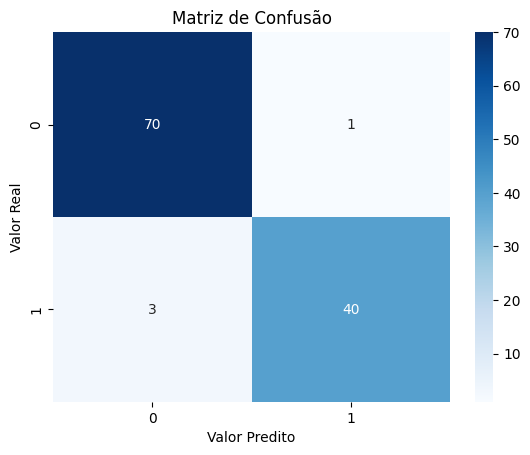

In [ ]:
# Avaliar o modelo no conjunto de teste
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Acurácia do modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia: {accuracy:.4f}')

# Matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusão')
plt.ylabel('Valor Real')
plt.xlabel('Valor Predito')
plt.show()
